In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py
filename = "/content/drive/My Drive/datasets/lungnodemalignancy/all_patches.hdf5"
dataset = h5py.File(filename, "r")

In [0]:
type(dataset)

h5py._hl.files.File

In [0]:
list(dataset)

['ct_slices', 'slice_class']

In [0]:
dataset['ct_slices'][1]

array([[-670., -713., -738., ..., -909., -939., -948.],
       [-746., -806., -827., ..., -930., -968., -959.],
       [-799., -851., -861., ..., -943., -979., -981.],
       ...,
       [  18.,    8.,    9., ...,  -88.,  -91., -103.],
       [ -10.,    2.,   12., ...,  -97., -102., -107.],
       [ -40.,   -6.,   14., ...,  -95.,  -99.,  -97.]], dtype=float32)

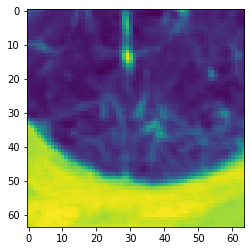

In [0]:
import matplotlib.pyplot as plt
plt.imshow(dataset['ct_slices'][1])

In [0]:
len(dataset['slice_class'])

6691

In [0]:
ct_slices = []
slice_classes = []
for i in range(len(dataset['ct_slices'])):
  ct_slices.append(dataset['ct_slices'][i])
  slice_classes.append(dataset['slice_class'][i])  

In [0]:
slice_class = list(slice_classes)

In [0]:
count = 0
slice_class = []
s1 = 'not_affected'
s2 = 'affected'
for i in range(len(slice_classes)):
  if slice_classes[i] == 0:
    slice_class.append(s1)
  if slice_classes[i] == 1:
    slice_class.append(s2)

In [0]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    print(unique_list)

In [0]:
unique(p)

['affected', 'not_affected']


In [0]:
len(dataset['ct_slices'])

6691

In [0]:
6691-4165

2526

In [0]:
# 2526 - 1's
# 4165 - 0's

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]


Using TensorFlow backend.


In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
slice_class = p

In [0]:
unique_list = ['affected', 'not_affected']

In [0]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(unique_list), activation='softmax')(x)

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


**Code** for preparing **Train Set** & **Test Set**

In [0]:
import cv2

In [0]:
train_images = []
train_labels = []
test_images = []
test_labels = []
count = 0
counted_list = []
while(count<=len(dataset['ct_slices'])):
  test_images.append(dataset['ct_slices'][count])
  test_labels.append(dataset['slice_class'][count])
  counted_list.append(count)
  count = count + 23
  


In [0]:
len(test_images)

291

In [0]:
test_labels[1]

array([1.])

In [0]:
len(counted_list)

291

In [0]:
for i in range(len(dataset['ct_slices'])):
  if dataset['ct_slices'][i] not in test_images:
    train_images.append(dataset['ct_slices'][i])
    train_labels.append(dataset['slice_class'][i])

ValueError: ignored

In [0]:
k = len(dataset['ct_slices'])
for i in range(k):
  if i in counted_list:
    pass
  else:
    train_images.append(dataset['ct_slices'][i])
    train_labels.append(dataset['slice_class'][i])

In [0]:
len(train_images)

6400

In [0]:
len(train_labels)

6400

AttributeError: ignored

In [0]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    print(unique_list)

In [0]:
unique(slice_class)

['affected', 'not_affected']


In [0]:
for i in range(len(dataset['ct_slices'])):
  
  

array([[-670., -713., -738., ..., -909., -939., -948.],
       [-746., -806., -827., ..., -930., -968., -959.],
       [-799., -851., -861., ..., -943., -979., -981.],
       ...,
       [  18.,    8.,    9., ...,  -88.,  -91., -103.],
       [ -10.,    2.,   12., ...,  -97., -102., -107.],
       [ -40.,   -6.,   14., ...,  -95.,  -99.,  -97.]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

In [0]:
import cv2
ct_iamges = [cv2.imread(x) lambda x: for x in dataset['slices']]

SyntaxError: ignored

In [0]:
from google.colab import files
import matplotlib.pyplot as plt
plt.savefig(dataset['ct_slices'][1])
files.upload("/content/drive/My Drive/datasets/image.png")

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
import cv2
import os

In [0]:
destination_path_affected = '/content/drive/My Drive/datasets/lungnodemalignancy/dataset/affected' 

In [0]:
destination_path_not_affected = '/content/drive/My Drive/datasets/lungnodemalignancy/dataset/not_affected'

In [0]:
not_affected_images = []
affected_images = []
for i in range(len(dataset['ct_slices'])):
  if dataset['slice_class'][i] == 1:
    affected_images.append(dataset['ct_slices'][i])
  if dataset['slice_class'][i] == 0:
    not_affected_images.append(dataset['ct_slices'][i])

In [0]:
len(not_affected_images)
len(affected_images)
4165 +2526

6691

preparing train and test sets 

In [0]:
destination_path_affected = '/content/drive/My Drive/datasets/lungnodemalignancy/dataset/affected' 

In [0]:
destination_path_not_affected = '/content/drive/My Drive/datasets/lungnodemalignancy/dataset/not_affected'

In [0]:
from glob import glob
count_affected = 0
for i in glob(destination_path_affected + '/*'):
  count_affected = count_affected + 1

In [0]:
count_affected

2526

In [0]:
from glob import glob
count_not_affected = 0
for i in glob(destination_path_not_affected + '/*'):
  count_not_affected = count_not_affected + 1

In [0]:
count_not_affected

4165

In [0]:
count_affected + count_not_affected

6691

In [0]:
25260/100

252.6

In [0]:
4165*20/100

833.0

In [0]:
pwd

'/content'

In [0]:
import os
os.chdir('/content/drive/My Drive/datasets/lungnodemalignancy/test/affected')

In [0]:
pwd

'/content/drive/My Drive/datasets/lungnodemalignancy/test/affected'

In [0]:
import cv2
count = 0
for i in glob(destination_path_affected + '/*'):
  k = cv2.imread(i)
  count = count + 1
  image = 'test'+str(count)+'.png'
  cv2.imwrite(image,k)
  if(count == 252):
    break

In [0]:
os.chdir('/content/drive/My Drive/datasets/lungnodemalignancy/test/not_affected')

In [0]:
pwd

'/content/drive/My Drive/datasets/lungnodemalignancy/test/not_affected'

In [0]:
import cv2
count = 0
for i in glob(destination_path_not_affected + '/*'):
  k = cv2.imread(i)
  count = count + 1
  image = 'test'+str(count)+'.png'
  cv2.imwrite(image,k)
  if(count == 833):
    break

In [0]:
test_affected = [cv2.imread(x) for x in glob('/content/drive/My Drive/datasets/lungnodemalignancy/test/affected/*')]

In [0]:
test_not_affected = [cv2.imread(x) for x in glob('/content/drive/My Drive/datasets/lungnodemalignancy/test/not_affected/*')]

In [0]:
len(test_affected)

252

In [0]:
len(test_not_affected)

833

In [0]:
os.chdir('/content/drive/My Drive/datasets/lungnodemalignancy/train/affected')

In [12]:
pwd

'/content/drive/My Drive/datasets/lungnodemalignancy/train/affected'

In [0]:
import os
from glob import glob
import cv2

In [14]:
pwd

'/content/drive/My Drive/datasets/lungnodemalignancy/train/affected'

In [0]:
count = 0
for i in glob("/content/drive/My Drive/datasets/lungnodemalignancy/dataset/affected/*"):
  count = count + 1
  if(count>252):
    k = cv2.imread(i)
    image = 'train' + str(count) + '.png'
    cv2.imwrite(image,k)
  elif(count<=252):
    pass    

In [0]:
count1 = 0
for i in glob('/content/drive/My Drive/datasets/lungnodemalignancy/train/affected/*'):
  count1 = count1 + 1

In [17]:
count1

2274

In [0]:
os.chdir('/content/drive/My Drive/datasets/lungnodemalignancy/train/not_affected')

In [19]:
pwd

'/content/drive/My Drive/datasets/lungnodemalignancy/train/not_affected'

In [0]:
count2 = 0
for i in glob("/content/drive/My Drive/datasets/lungnodemalignancy/dataset/not_affected/*"):
  count2 = count2 + 1
  if(count2>833):
    k = cv2.imread(i)
    image = 'train' + str(count2) + '.png'
    cv2.imwrite(image,k)
  elif(count<=833):
    pass    